# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

$\textbf{Løsning:}$

For lengden er det mest hensiktsmessige valget å bruke $x' = x/L$ og $y' = y/L$, som gir $r' = \sqrt{x'^2 + y'^2} = r/L$.

For potensialet fins det flere valg, men det enkleste er nok å bruke
\begin{equation}
V'(r') := V(r') \frac{4\pi \epsilon_0}{q} = 1/r'\text{.}
\end{equation}

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [1]:
import numpy as np

# Number of discrete points, it's usually a good idea to define this as a variable. It's also important to choose
# an appropriate value for this. If N is even , origo is not contained in our discretization, and we avoid divison by zero.
N = 32

# Generate 1-dimensional arrays containing x- and y- values.
x = y = np.linspace(-1, 1, N)

# Generate two 101 x 101 arrays containing the 2-dimensional coordinate values for x and y respectively.The negative 
# sign in front of the y variable is necessary, if not the array would have the negative values on top,
# and the positive below.
xv, yv = np.meshgrid(x, -y) 

$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [2]:
# Generate the potential. Note that this will necessarily result in a divide by zero error if you include (0,0) as a point in
# the grid, however in our particular case it's unproblmatic since it the divide by zero is done via a numpy array. Using numpy's
# array operation, rather than doing everything element-by-element inside a loop is not only a lot more efficient in terms of
# how much code is necessary, it also runs significantly faster
V = 1/np.sqrt(xv**2 + yv**2)

$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

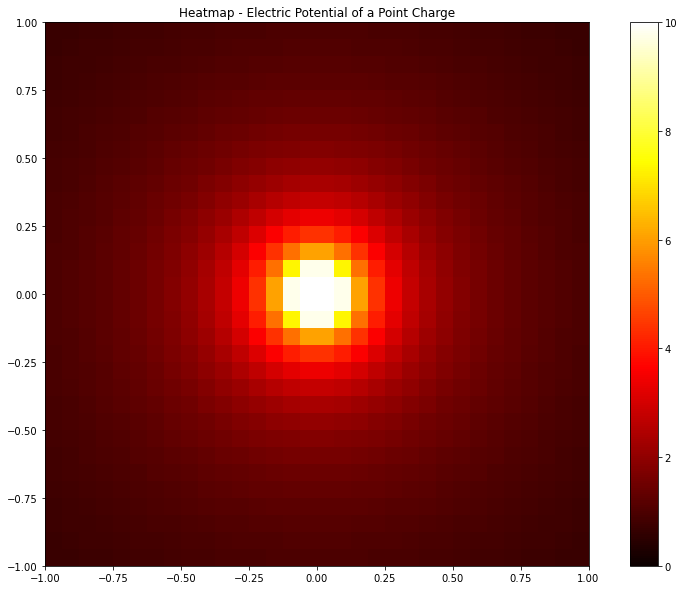

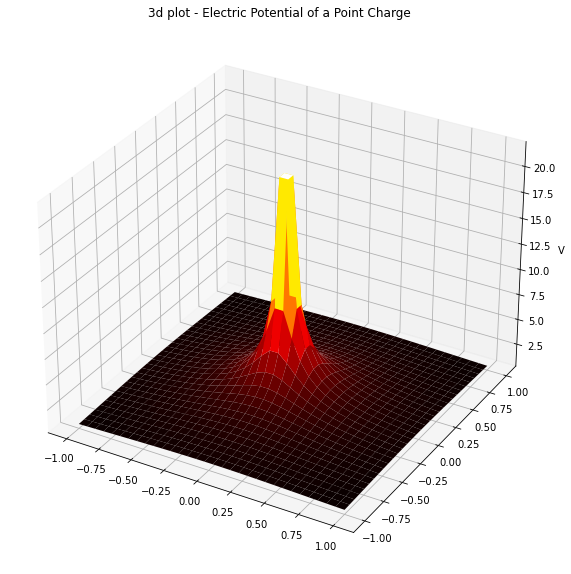

In [3]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 10] # Makes the figures bigger in Jupyter
from mpl_toolkits.mplot3d import Axes3D # Library for 3d-plots

# Plot the array elements of V as a heatmap, this one is fairly straight-forward
plt.imshow(V,                       # Scalar field to plot
           cmap='hot',              # Colour choice, there are some fancy options out there
           vmin=0, vmax=10,         # Set min and max values to be included in the heatmap
           extent=(-1, 1, -1, 1))   # Extent of the axis values

cb = plt.colorbar() # Creates a colourbar for the heatmap

plt.title('Heatmap - Electric Potential of a Point Charge')
plt.show()

# Plot the array elements of V as a 3d surface, this one is more tricky as you need to make a
# figure-like object, declare that it's for 3d-plotting, and only then can we create the 3d surface plot

fig = plt.figure() # Creates a figure object

ax = fig.gca(projection='3d') # Creates a 3d projection in the figure

surf = ax.plot_surface(xv, yv,      # x- and y-axes
                       V,           # z-values
                       cmap='hot')  # Colour choice

ax.set_title('3d plot - Electric Potential of a Point Charge')
ax.set_zlabel('V')

plt.show()

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

$\textbf{Løsning:}$

\begin{equation}
    E_x(x_\text{i}, y_\text{i}) = -\frac{V(x_\text{i+1}, y_\text{i})-V(x_\text{i-1}, y_\text{i})}{x_\text{i+1}-x_\text{i-1}}\text{.}
\end{equation}

\begin{equation}
    E_y(x_\text{i}, y_\text{i}) = -\frac{V(x_\text{i}, y_\text{i+1})-V(x_\text{i}, y_\text{i-1})}{y_\text{i+1}-y_\text{i-1}}\text{.}
\end{equation}

------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [4]:
delta = x[1] - x[0] # Distance between each discrete point, normally this would be defined in the start.

# Function to calculate the (negative) gradient of a potential.
# Input: potential, NxN array 
# Output: x- and y- component of the gradient as two (N-2)x(N-2) arrays
def E_field(V):
    # Calculates the central difference in the x-direction
    Ex = -(V[1:N-1,2:N] - V[1:N-1,0:N-2])
    
    # Calculates the central difference in the y-direction
    Ey = -(V[2:N,1:N-1] - V[0:N-2,1:N-1])
    
    # Removes all vectors with size above 10 by setting them to np.nan, a special floating point value 
    # often used when we don't care about the value of an element, to make plotting less problematic
    Ex[np.abs(Ex) > 10] = np.nan
    Ey[np.abs(Ey) > 10] = np.nan
    
    # Returns the x- and y-component of the electric field as two variables
    return Ex/delta, Ey/(2*delta)

Ex, Ey = E_field(V)

$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$. Hvis du har valgt å bruke en stor verdi for $n$ kan det være en fordel å kun plotte noen av de (f.eks. $\texttt{A[::5, ::5]}$ vil returnere en array som inneholder kun hvert femte element av en array, $\texttt{A}$).

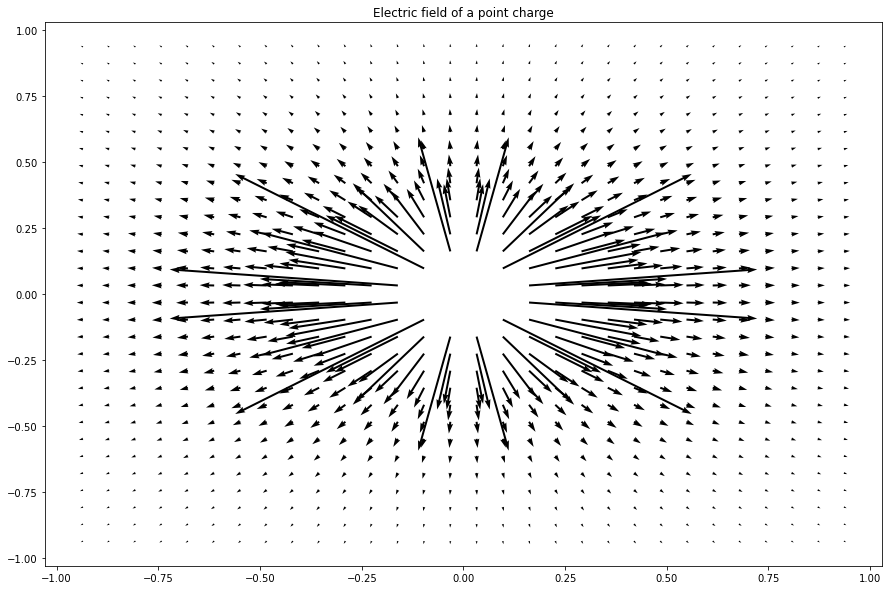

In [5]:
# Plots the electric field as a quiver plot. Quiver-plots can be tricky to manage if the scale
# varies greatly between the values. In this case, you have several options, either normalising all of the 
# vectors, or choosing a cut-off value (here, the second method has been used).

plt.quiver(x[1:N-1], y[1:N-1],     # Axis values
           Ex, Ey)                 # x- and y- component of the vector field

plt.title('Electric field of a point charge')
plt.show()